Required libraries

In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install regex

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import math

##Importing and preparing the dataset

In [2]:
dataset = pd.read_csv('Load Profiles.csv')
dataset

,Date/Time,Heating/Cooling,Fans,InteriorLights,ExteriorLights,InteriorEquipment,Misc : InteriorEquipment
0,01/01 01:00:00,0.249108,0.048803,0.061268,0.011206,2.826843,0.315209
1,01/01 02:00:00,0.286937,0.056214,0.035740,0.006537,3.130111,0.290224
2,01/01 03:00:00,0.313726,0.061462,0.025528,0.004669,3.371758,0.286859
3,01/01 04:00:00,0.336854,0.065993,0.025528,0.004669,3.607986,0.282821
4,01/01 05:00:00,0.358424,0.070219,0.025528,0.004669,3.888659,0.272138
...,...,...,...,...,...,...,...
8755,12/31 20:00:00,0.098779,0.019352,0.295776,0.054100,2.069969,0.501625
8756,12/31 21:00:00,0.105840,0.020735,0.269368,0.049269,2.015142,0.518871
8757,12/31 22:00:00,0.112770,0.022093,0.227114,0.041541,1.967728,0.506757
8758,12/31 23:00:00,0.129033,0.025279,0.169015,0.030914,1.971973,0.438533


In [3]:
data = dataset.to_numpy()
Total = []
for row in data:
    Total.append(np.sum(row[1:]))

In [4]:
x = []
for el in dataset['Date/Time']:
    match = re.match(r'^ ([0-9]{2})\/([0-9]{2})  ([0-9]{2})', el)
    x.append([int(match[2]), int(match[1]), int(match[3])])    

Displaying the load profiles

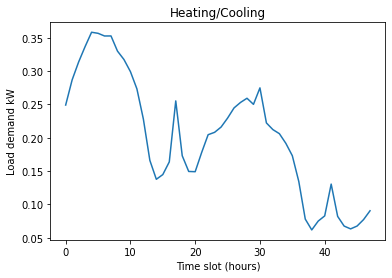

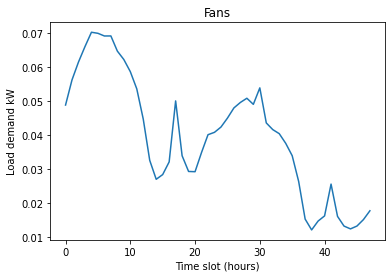

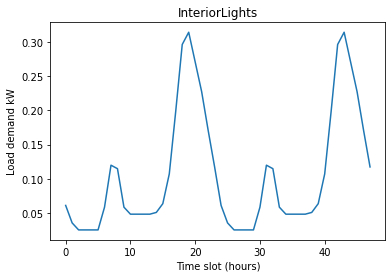

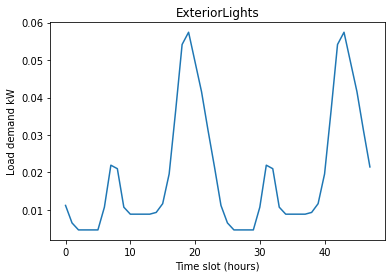

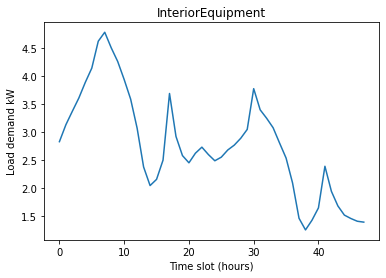

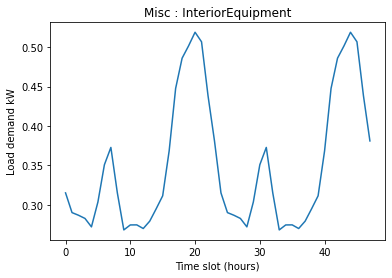

In [5]:
for col in dataset:
    if col != 'Date/Time':
        plt.plot(dataset[col][0:48])
        plt.xlabel('Time slot (hours)')
        plt.ylabel('Load demand kW')
        plt.title(col)
        plt.show()

Total Load for the first 48 hours

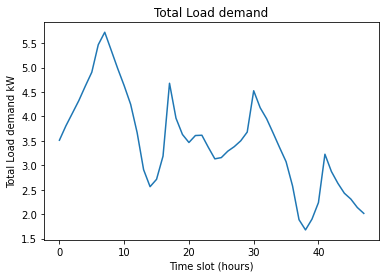

In [6]:
plt.xlabel('Time slot (hours)')
plt.ylabel('Total Load demand kW')
plt.title('Total Load demand')
plt.plot(Total[:48])

In [7]:
# Average Monthly Usage
print("Average Monthly Usage : ", np.sum(Total), "kWh")

# Daily Usage
daily_usage = np.sum(Total)/(12*30)
print("Daily Usage : ", daily_usage, "kWh")

# Size of the Solar System

# Avg 7 Sun Hours, Efficiency Factor = 1.15
size = (daily_usage / 7) * 1.15
print("Size if a single solar system is used : ", size.round(4), "kW")

print("Hourly Usage : ", daily_usage/24)

print("Size of the Solar System : ", math.ceil((daily_usage/24).round(4)), "kW")
print("Size of the Wind System : ", 2, "kW")

Average Monthly Usage :  20142.296492463003 kWh
Daily Usage :  55.950823590175006 kWh
Size if a single solar system is used :  9.1919 kW
Hourly Usage :  2.331284316257292
Size of the Solar System :  3 kW
Size of the Wind System :  2 kW
